# Imports

In [41]:
#importing necessary libraries
import pandas as pd
import random

# Dataset Generation

In [42]:
regions=["North America", "Europe", "Asia", "South America", "Africa", "Australia"]
compliance_status=["Compliant", "Non Compliant"]

In [43]:
def random_ip():
    return f"{random.randint(1, 255)}.{random.randint(0, 255)}.{random.randint(0, 255)}.{random.randint(0, 255)}"

In [44]:
data = {
    "License_Key": [f"KEY-{i:05d}" for i in range(1, 10001)],  # 10,000 unique keys
    "User_IP": [random_ip() for _ in range(10000)],  # Random IPs
    "Region": [random.choice(regions) for _ in range(10000)],  # Random regions
    "Usage_Hours": [random.randint(0, 500) for _ in range(10000)],  # Usage hours (0-500 hours)
    "Compliance_Status": [random.choice(compliance_status) for _ in range(10000)]  # Compliance
}

In [45]:
df=pd.DataFrame(data)
df.head()

,License_Key,User_IP,Region,Usage_Hours,Compliance_Status
0,KEY-00001,197.194.218.252,South America,367,Compliant
1,KEY-00002,4.213.85.213,North America,303,Compliant
2,KEY-00003,115.231.91.110,Australia,296,Compliant
3,KEY-00004,146.222.255.45,South America,362,Compliant
4,KEY-00005,146.3.151.40,Australia,293,Compliant


In [46]:
df.to_csv("mock_compliance_dataset.csv", index=False)

# Visualizations

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

Compliance status distribution

In [51]:
compliance_counts=df["Compliance_Status"].value_counts()
compliance_counts

Compliance_Status
Non Compliant    5008
Compliant        4992
Name: count, dtype: int64

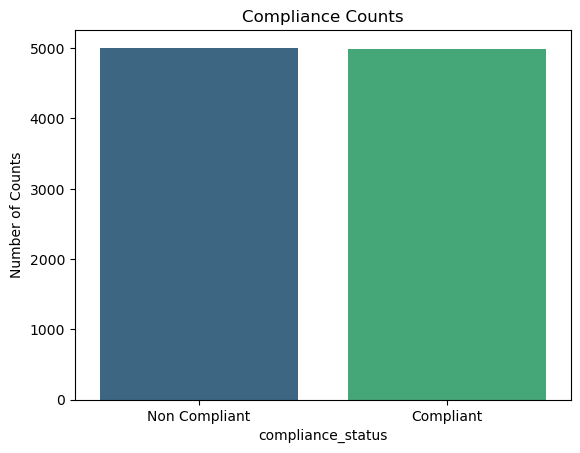

In [52]:
plt.figure()
sns.barplot(x=compliance_counts.index, y=compliance_counts.values, palette="viridis")
plt.title("Compliance Counts")
plt.xlabel("compliance_status")
plt.ylabel("Number of Counts")
plt.show()

Regional Insights

In [53]:
region_stats=df.groupby(["Region", "Compliance_Status"]).size().unstack()
region_stats

Compliance_Status,Compliant,Non Compliant
Region,,
Africa,818,858
Asia,829,803
Australia,851,834
Europe,829,850
North America,846,875
South America,819,788


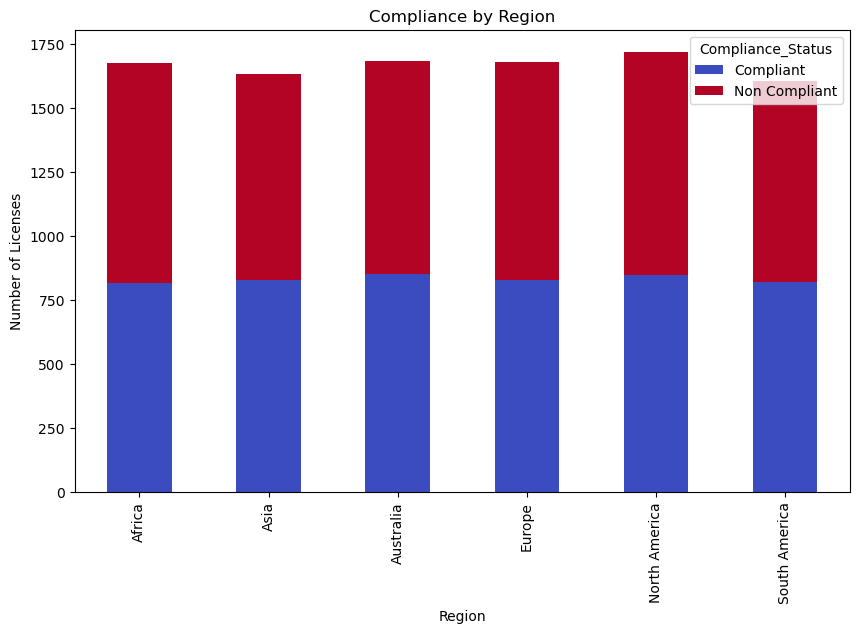

In [54]:
region_stats.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
plt.title("Compliance by Region")
plt.xlabel("Region")
plt.ylabel("Number of Licenses")
plt.show()

Top Non Compliant IP's

In [55]:
non_compliant_ips=df[df["Compliance_Status"]=="Non Compliant"]
non_compliant_ips

,License_Key,User_IP,Region,Usage_Hours,Compliance_Status
7,KEY-00008,234.137.222.14,Europe,126,Non Compliant
9,KEY-00010,115.12.94.0,Europe,484,Non Compliant
11,KEY-00012,179.58.0.200,North America,167,Non Compliant
14,KEY-00015,24.55.97.249,Asia,194,Non Compliant
16,KEY-00017,45.224.131.144,Australia,69,Non Compliant
...,...,...,...,...,...
9986,KEY-09987,113.182.11.101,South America,468,Non Compliant
9989,KEY-09990,34.48.159.27,South America,164,Non Compliant
9990,KEY-09991,126.100.224.205,Africa,89,Non Compliant
9992,KEY-09993,120.252.185.50,Asia,168,Non Compliant


In [56]:
top_non_compliant_ips=non_compliant_ips.sort_values(by="Usage_Hours", ascending=False).head(20)
top_non_compliant_ips

,License_Key,User_IP,Region,Usage_Hours,Compliance_Status
7881,KEY-07882,92.12.219.49,Australia,500,Non Compliant
4194,KEY-04195,43.34.219.6,Australia,500,Non Compliant
4014,KEY-04015,109.240.151.26,Africa,500,Non Compliant
6617,KEY-06618,175.193.99.45,Africa,500,Non Compliant
9011,KEY-09012,115.144.219.183,South America,500,Non Compliant
3855,KEY-03856,99.169.102.201,Asia,500,Non Compliant
1521,KEY-01522,10.70.37.23,Europe,500,Non Compliant
6280,KEY-06281,88.75.103.192,Australia,500,Non Compliant
9945,KEY-09946,89.134.75.78,Australia,500,Non Compliant
6104,KEY-06105,42.193.254.99,Europe,500,Non Compliant


Usage hours Distribution

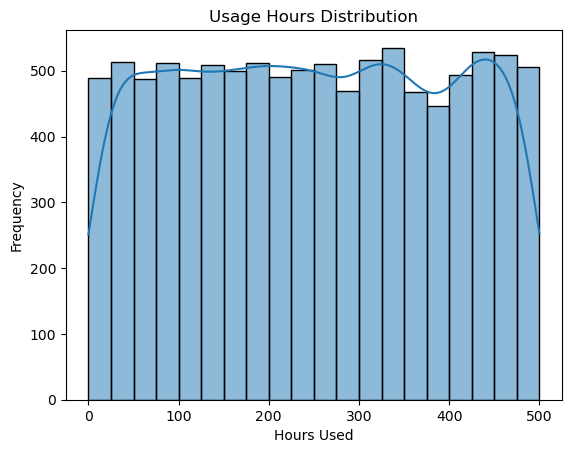

In [63]:
sns.histplot(df["Usage_Hours"], bins=20, kde=True)
plt.title("Usage Hours Distribution")
plt.xlabel("Hours Used")
plt.ylabel("Frequency")
plt.show()

Compliance Rate by Region

In [78]:
compliance_rate_by_region=(df[df["Compliance_Status"]=="Compliant"].groupby("Region").size()/df.groupby("Region").size())*100
compliance_rate_by_region

Region
Africa           48.806683
Asia             50.796569
Australia        50.504451
Europe           49.374628
North America    49.157467
South America    50.964530
dtype: float64

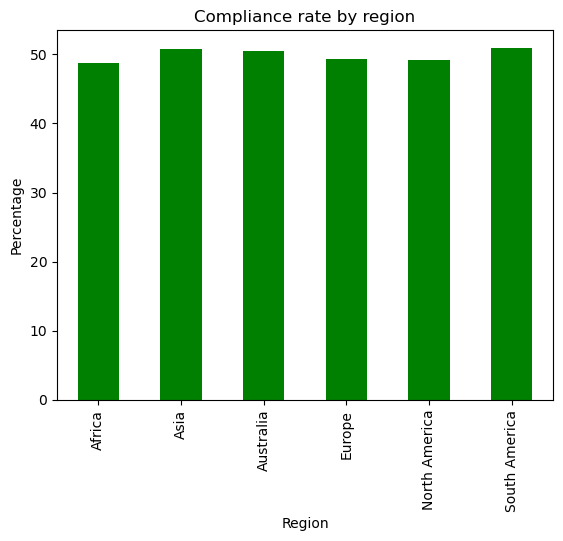

In [86]:
compliance_rate_by_region.plot(kind="bar", color="green")
plt.title("Compliance rate by region")
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.show()

Key findings:
- Compliance Status = 50% compliance, 49.9% non compliance as the data is random.
- Regional Insights - North American country has the highest number of users and almost every continent has equal number of compliant and non compliant users.
- Top Non Compliant IP's - Top 20 non compliant IP users by hours is given, we have to give attention to them.
- Usage hours Distribution - Usage Hours distribution has minimum frequency of 340 hours and maximum frequency of 380 hours
- Compliance Rate by Region - South America has the Highest number of compliant users.